#### Importing Libraries

In [1]:
# Libraries for visualization...
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for dataset manipulation...
import numpy as np
import pandas as pd

# Tensorflow and Keras Library for Deep Learning...
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers, models
from keras.callbacks import TensorBoard
from keras.layers import Dense, RandomFlip, RandomZoom, RandomRotation, RandomContrast

In [2]:
# Libraries for Image processing...
import cv2
import PIL.Image as Image

In [3]:
# Library for Path Extraction...
import pathlib

#### Data Wrangling and Preprocessing

In [4]:
data_train = "E:/Downloads/train/"
data_train = pathlib.Path(data_train)    # Converting String to path...
data_train

WindowsPath('E:/Downloads/train')

In [5]:
image_count = len(list(data_train.glob('*/*.jpg')))      # Getting the list of the number of Train Images...
print(image_count)

557


In [6]:
data_test = "E:/Downloads/test/"
data_test = pathlib.Path(data_test)      # Converting string to path...
data_test

WindowsPath('E:/Downloads/test')

In [7]:
image_count = len(list(data_test.glob("*/*.jpg")))   # Getting the list of the number of Test Images...
print(image_count)

140


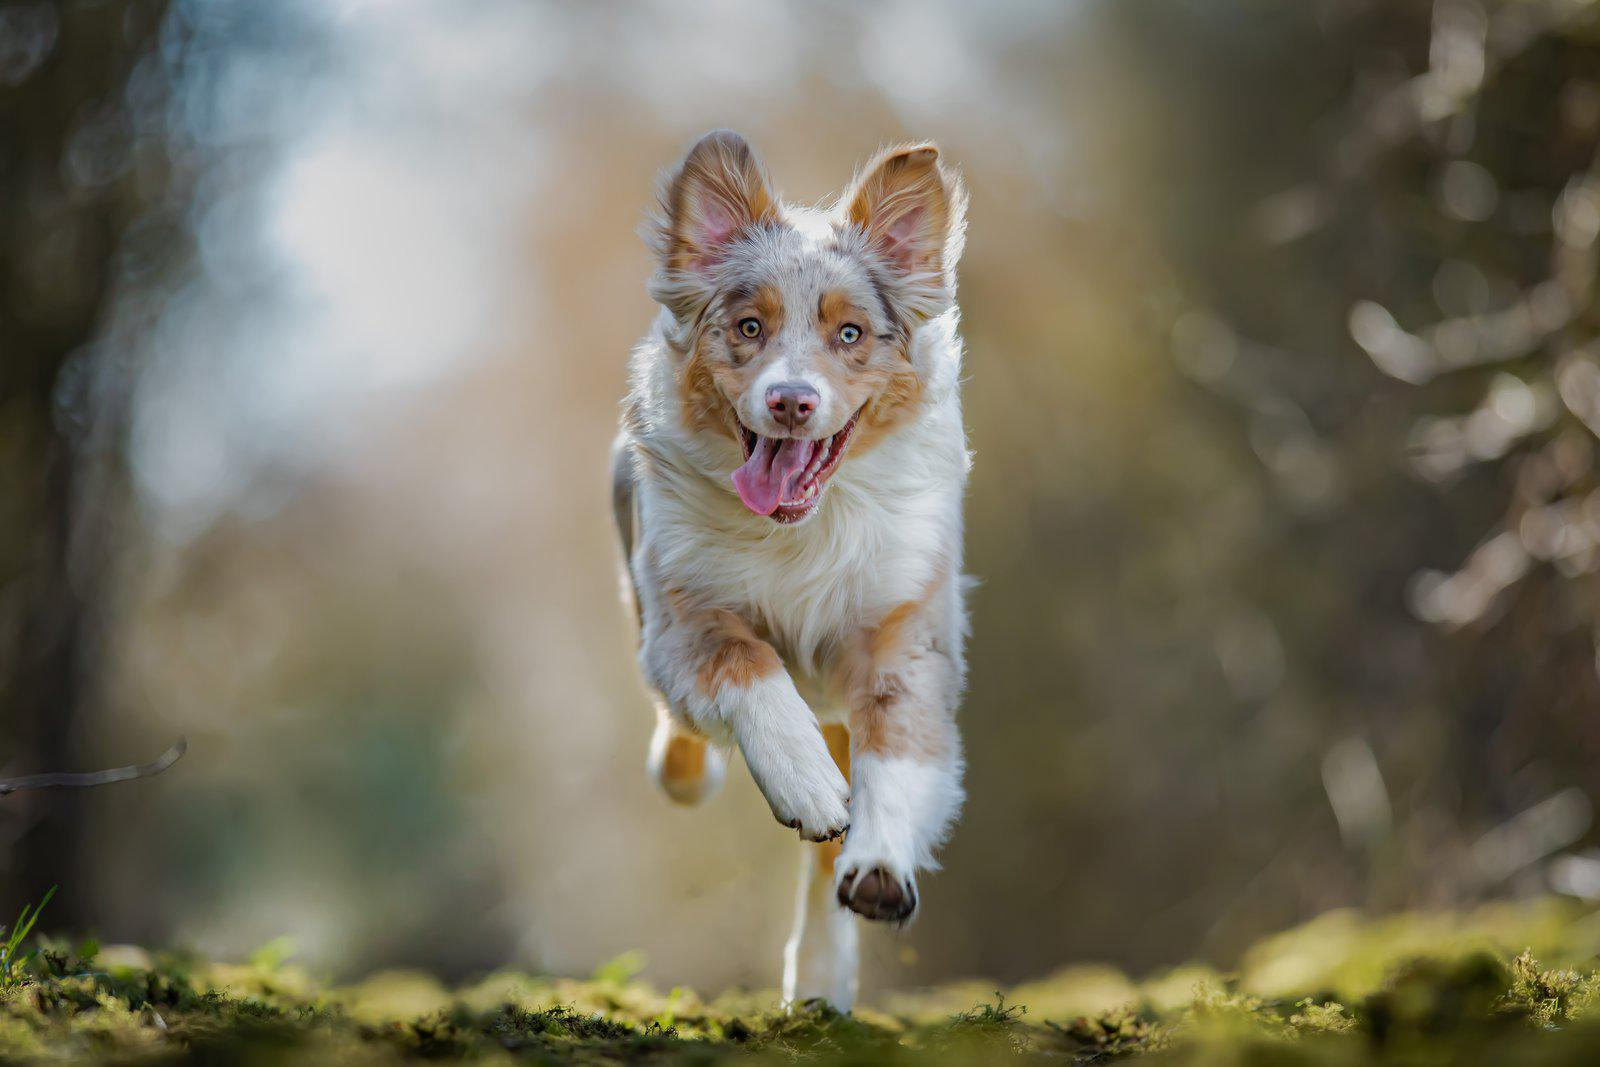

In [8]:
DogsTrain = list(data_train.glob('dogs/*'))    # Making a list of paths...
Image.open(str(DogsTrain[0]))

#### Data Splitting 

In [9]:
AnimalDictionaryTrain = {
    "Dogs" : list(data_train.glob("dogs/*")),     # Paths defined for each case...
    "Cats" : list(data_train.glob("cats/*"))
}

AnimalDictionaryTest = {
    "Dogs" : list(data_test.glob("dogs/*")),
    "Cats" : list(data_test.glob("cats/*"))
}

In [10]:
AnimalLabelTrain = {
    "Dogs" : 0,         # Defining the labels for each case...
    "Cats" : 1
}

AnimalLabelTest = {
    "Dogs" : 0,
    "Cats" : 1
}

In [11]:
def DatasetCreation(x, y, dictionary):              # Function created...
    for Animal, AnimalPath in dictionary.items():
        for path in AnimalPath:
            Img = cv2.imread(str(path))        # Converting path to string...
            Img = cv2.resize(Img, (360, 360))    # Resizing the Image to 360 x 360 pixels...
            x.append(Img)
            y.append(AnimalLabelTrain[Animal])
    return x, y

    Creating the Training Dataset

In [12]:
Xtrain, Ytrain = [], []
Xtrain, Ytrain = DatasetCreation(Xtrain, Ytrain, AnimalDictionaryTrain)

In [13]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain).reshape(-1, 1)
print(Xtrain.shape, Ytrain.shape)

(557, 360, 360, 3) (557, 1)


    Creating the Testing dataset

In [14]:
Xtest, Ytest = [], []
Xtest, Ytest = DatasetCreation(Xtest, Ytest, AnimalDictionaryTest)

In [15]:
Xtest = np.array(Xtest)
Ytest = np.array(Ytest).reshape(-1, 1)
print(Xtest.shape, Ytest.shape)

(140, 360, 360, 3) (140, 1)


#### Data Feature Extraction

In [16]:
XtrainScaled = Xtrain / 255     # Normalizing...
XtestScaled = Xtest / 255       # Normalizing...

Performing data augmentation.

In [17]:
DataAugmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),     # Image flipping...
    RandomZoom(0.3),       # Image zooming...
    RandomRotation(0.2),    # Image Rotating...
    RandomContrast(0.4),    # Image Contrasting...
])

First Convolutional Neural Network Model

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten    # Calling various layers of Keras...
classes = 2    # Since we have two animals cats and dogs thus, the number of classes is two...

ConvolutionalNeuralNetwork = Sequential([
    Conv2D(filters=36, input_shape=(360, 360, 3), kernel_size=3, strides=(1,1), padding="same", activation="relu", name="convolution1"),   # Input shape is (360, 360, 3)...
    MaxPooling2D((3, 3)),      # Pooling size is 3 x 3 matrix...
    Conv2D(filters=28, kernel_size=4, strides=(2,2), padding="same", activation="relu", name="convolution2"),
    MaxPooling2D((3, 3)),      # Pooling size is 3 x 3 matrix...
    Conv2D(filters=24, kernel_size=3, strides=(1,1), padding="same", activation="relu", name="convolution3"),
    MaxPooling2D((3, 3)),      # Pooling size is 3 x 3 matrix...
    Flatten(name="Flattening"),      # Flattening layer...
    Dense(128, activation="relu"),   # Output layer = 128 neurons, Input layer = 24 neurons...
    Dense(classes)                   # Output layer = 2 neurons, Input layer = 128 neurons...
])

In [19]:
from keras.losses import sparse_categorical_crossentropy
from keras.metrics import accuracy

Tensorboard = TensorBoard(log_dir="Directory/CNN1", histogram_freq=1)    # Using Tensorboard for graph plotting...
ConvolutionalNeuralNetwork.compile(
    optimizer = "adam",     # Adam Optimizer...
    loss = sparse_categorical_crossentropy,    # Loss function as Sparse Categorical Cross-entropy...
    metrics = ['accuracy']     # metrics as accuracy...
)

In [20]:
ConvolutionalNeuralNetwork.build(input_shape=(360, 360, 3))   # Building the model...
ConvolutionalNeuralNetwork.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution1 (Conv2D)       (None, 360, 360, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 36)     0         
 )                                                               
                                                                 
 convolution2 (Conv2D)       (None, 60, 60, 28)        16156     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 28)       0         
 2D)                                                             
                                                                 
 convolution3 (Conv2D)       (None, 20, 20, 24)        6072      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 24)        

In [21]:
ConvolutionalNeuralNetwork.fit(XtrainScaled, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
18/18 [==============================] - 25s 1s/step - loss: 0.8891 - accuracy: 0.4865
Epoch 2/10
18/18 [==============================] - 23s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 3/10
18/18 [==============================] - 24s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 4/10
18/18 [==============================] - 23s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 5/10
18/18 [==============================] - 23s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 6/10
18/18 [==============================] - 22s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 7/10
18/18 [==============================] - 23s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 8/10
18/18 [==============================] - 23s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 9/10
18/18 [==============================] - 22s 1s/step - loss: 0.6931 - accuracy: 0.5009
Epoch 10/10
18/18 [==============================] - 23s 1s/step - loss: 0.6931 - accuracy: 0.5009


    Intuition:-
    1. The Accuracy becomes stagnant, it does not rise more than 50% irrespective of the number of Epochs, thus it becomes a case of Vanishing Gradient.

Second Convolutional Neural Network Model

In [22]:
CNN1 = Sequential([
    Conv2D(filters=64, kernel_size=3, input_shape=(360, 360, 3), activation="relu", padding="same", name="conv1"),   # Input shape same as that of the resized Images...
    MaxPooling2D(pool_size=(2, 2)),    # Pooling size is 2 x 2 matrix...
    Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", name="conv2"),
    MaxPooling2D(pool_size=(2, 2)),    # Pooling size is 2 x 2 matrix...
    Flatten(name="Flattening"),      # Flattening layer...
    Dense(32, activation="relu", name="dense1"),      # Output layer = 32 neurons, Input layer = 32 neurons...
    Dense(16, activation="relu", name="dense2"),      # Output layer = 16 neurons, Input layer = 32 neurons...
    Dense(2, activation="sigmoid", name="dense3")    # Output layer = 2 neurons, Input layer = 16 neurons...
])

In [23]:
Tensorboard = TensorBoard(log_dir="Directory/CNN2", histogram_freq=1)    # Using Tensorboard...
CNN1.compile(
    optimizer = "adam",    # Adam optimizer...
    loss = sparse_categorical_crossentropy,  # Loss function as sparse categorical cross-entropy...
    metrics = ['accuracy']
)

In [24]:
CNN1.build(input_shape=(360, 360, 3))
CNN1.summary()    # Building the model and developing summary...

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 360, 360, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 180, 180, 64)     0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 180, 180, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 Flattening (Flatten)        (None, 259200)            0         
                                                                 
 dense1 (Dense)              (None, 32)               

In [25]:
CNN1.fit(XtrainScaled, Ytrain, epochs=10, callbacks=[Tensorboard])   # Model Training...

Epoch 1/10
18/18 [==============================] - 77s 4s/step - loss: 1.0017 - accuracy: 0.5278
Epoch 2/10
18/18 [==============================] - 110s 6s/step - loss: 0.6918 - accuracy: 0.4955
Epoch 3/10
18/18 [==============================] - 67s 4s/step - loss: 0.6760 - accuracy: 0.5601
Epoch 4/10
18/18 [==============================] - 64s 4s/step - loss: 0.6441 - accuracy: 0.6302
Epoch 5/10
18/18 [==============================] - 64s 4s/step - loss: 0.6146 - accuracy: 0.6643
Epoch 6/10
18/18 [==============================] - 64s 4s/step - loss: 0.5046 - accuracy: 0.7810
Epoch 7/10
18/18 [==============================] - 64s 4s/step - loss: 0.3803 - accuracy: 0.8510
Epoch 8/10
18/18 [==============================] - 64s 4s/step - loss: 0.2310 - accuracy: 0.9336
Epoch 9/10
18/18 [==============================] - 64s 4s/step - loss: 0.0920 - accuracy: 0.9767
Epoch 10/10
18/18 [==============================] - 64s 4s/step - loss: 0.0791 - accuracy: 0.9856


    Intuition-
    The Accuracy slowly rises to 98%. Thus, it is a good model fit for classification.

Third Convolutional Neural Network Model

In [39]:
CNN2 = Sequential([
    Conv2D(filters=64, kernel_size=3, input_shape=(360, 360, 3), activation="relu", padding="same", name="conv1"),     # Input shape same as the resized Images...
    MaxPooling2D(pool_size=(2, 2)),     # Pooling size of 2 x 2 matrix...
    Conv2D(filters=48, kernel_size=3, activation="relu", padding="same", name="conv2"),
    MaxPooling2D(pool_size=(2, 2)),     # Pooling size of 2 x 2 matrix...
    Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", name="conv3"),
    MaxPooling2D(pool_size=(2, 2)),     # Pooling size of 2 x 2 matrix...
    Flatten(name="Flattening"),      # Flattening layer = 32 neurons...
    Dense(32, activation="softmax", name="dense1"), # Output layer = 32 neurons, Input layer = 32 neurons...
    Dense(16, activation="relu", name="dense2"),    # Output layer = 16 neurons, Input layer = 32 neurons...
    Dense(8, activation="softmax", name="dense3"),  # Output layer = 8 neurons, Input layer = 16 neurons...
    Dense(2, activation="sigmoid", name="dense4")   # Output layer = 2 neurons, Input layer = 8 neurons...
])

In [41]:
Tensorboard = TensorBoard(log_dir="Directory/CNN3", histogram_freq=1)   # Tensorboard used...
CNN2.compile(
    optimizer = "adam",     # Adam Optimizer...
    loss = sparse_categorical_crossentropy,    # loss function as sparse-categorical-cross-entropy...
    metrics = ['accuracy']
)

In [42]:
CNN2.build(input_shape=(360, 360, 3))
CNN2.summary()    # Building and developing the summary of the model...

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 360, 360, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 180, 180, 64)     0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 180, 180, 48)      27696     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 48)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 90, 90, 32)        13856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)      

In [43]:
CNN2.fit(XtrainScaled, Ytrain, epochs=10, callbacks=[Tensorboard])   # Model Training...

Epoch 1/10
18/18 [==============================] - 74s 4s/step - loss: 0.6947 - accuracy: 0.4991
Epoch 2/10
18/18 [==============================] - 72s 4s/step - loss: 0.6940 - accuracy: 0.4991
Epoch 3/10
18/18 [==============================] - 72s 4s/step - loss: 0.6936 - accuracy: 0.4991
Epoch 4/10
18/18 [==============================] - 71s 4s/step - loss: 0.6934 - accuracy: 0.4991
Epoch 5/10
18/18 [==============================] - 72s 4s/step - loss: 0.6932 - accuracy: 0.4991
Epoch 6/10
18/18 [==============================] - 71s 4s/step - loss: 0.6932 - accuracy: 0.4991
Epoch 7/10
18/18 [==============================] - 72s 4s/step - loss: 0.6932 - accuracy: 0.4901
Epoch 8/10
18/18 [==============================] - 73s 4s/step - loss: 0.6932 - accuracy: 0.5009
Epoch 9/10
18/18 [==============================] - 72s 4s/step - loss: 0.6935 - accuracy: 0.5009
Epoch 10/10
18/18 [==============================] - 71s 4s/step - loss: 0.6936 - accuracy: 0.4560


In [29]:
CNN1.evaluate(XtestScaled, Ytest)   # Second model evaluation...

5/5 [==============================] - 4s 731ms/step - loss: 1.0751 - accuracy: 0.6214


[1.075052261352539, 0.6214285492897034]

In [27]:
ConvolutionalNeuralNetwork.evaluate(XtestScaled, Ytest)   # First model evaluation...

5/5 [==============================] - 2s 342ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931471824645996, 0.5]

In [44]:
CNN2.evaluate(XtestScaled, Ytest)    # Third model evaluation....

5/5 [==============================] - 4s 769ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931588053703308, 0.5]

In [30]:
Ypred = CNN1.predict(XtestScaled)

5/5 [==============================] - 4s 674ms/step


In [48]:
from sklearn.metrics import classification_report
Yclasses = [np.argmax(element) for element in Ypred]
print("Classification Report\n",classification_report(Ytest, Yclasses))

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.50      1.00      0.67        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327

In [37]:
Y1pred = ConvolutionalNeuralNetwork.predict(XtestScaled)

5/5 [==============================] - 1s 265ms/step


In [38]:
Y1classes = [np.argmax(element) for element in Y1pred]
print("Classification Report \n",classification_report(Ytest, Y1classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.50      1.00      0.67        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327

In [45]:
Y2pred = CNN2.predict(XtestScaled)

5/5 [==============================] - 4s 745ms/step


In [46]:
Y2classes = [np.argmax(element) for element in Y2pred]
print("Classification report \n",classification_report(Ytest, Y2classes))

Classification report 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        70
           1       0.00      0.00      0.00        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327

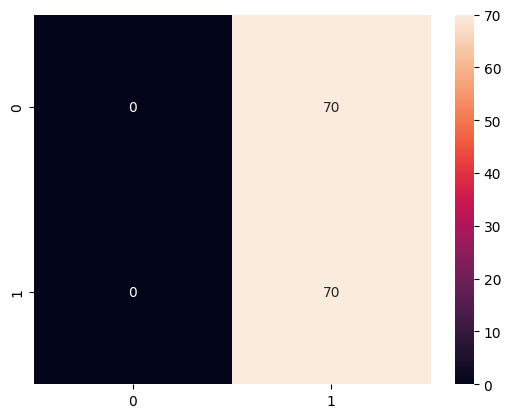

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, Yclasses)
sns.heatmap(cm, annot=True, fmt="g")
plt.show()